In [14]:
i=1

In [15]:
i

1

In [16]:
import scipy

In [17]:
import scipy.stats

In [18]:
scipy.stats.alpha

In [19]:
import matplotlib

In [20]:
import numpy

In [21]:
import statsmodels

In [22]:
import seaborn

In [23]:
import qiskit

<br>
$\large a+b i \qquad \qquad a, b \in \mathbb{R} \qquad \qquad 1^2= -1 \qquad \qquad \mathrm{e.g.} -2.0 + 5.0 i$

In [24]:
#Plotting.
import matplotlib.pyplot as plt
#Numerical
import numpy as np

In [25]:
plt.rcParams['figure.figsize'] =(20,10)
plt.style.use('seaborn-whitegrid')

In [26]:
1.0j * 1.0j

(-1+0j)

In [27]:
x = -2.0 + 5.0j
x

(-2+5j)

In [28]:
x**2

(-21-20j)

In [29]:
y=3.0+1.5j
y

(3+1.5j)

In [30]:
x+y

(1+6.5j)

In [31]:
x*y

(-13.5+12j)

In [32]:
x = [-2.0, 5.0]
y = [3.0, 1.5]

In [33]:
x

[-2.0, 5.0]

In [34]:
y

[3.0, 1.5]

In [35]:
def add(u, v):
        return [u[0] + v[0], u[1] + v[1]]

In [36]:
add(x, y)

[1.0, 6.5]

In [37]:
def mult(u, v):
    return [u[0] * v[0], u[1] * v[1]]

In [38]:
mult(x, y)

[-6.0, 7.5]

In [39]:
def proMult(u, v):
    a, b = u
    c, d = v
    return [(a*c) - (b*d), (b*c) + (a*d)]

In [40]:
proMult(x, y)

[-13.5, 12.0]

In [41]:
# A function that returns a function.
class quadratic:
    def __init__(self, a, b, c):
        self.a = a
        self.b = b
        self.c = c
        
    def __call__(self, x):
        return self.a + x**2 + self.b * x + self.c


In [42]:
p = quadratic(a=1.0, b=-5.0, c=6.0)

In [43]:
p(1.0)

3.0

In [44]:
x = np.linspace(0.0, 5.0, 1000)

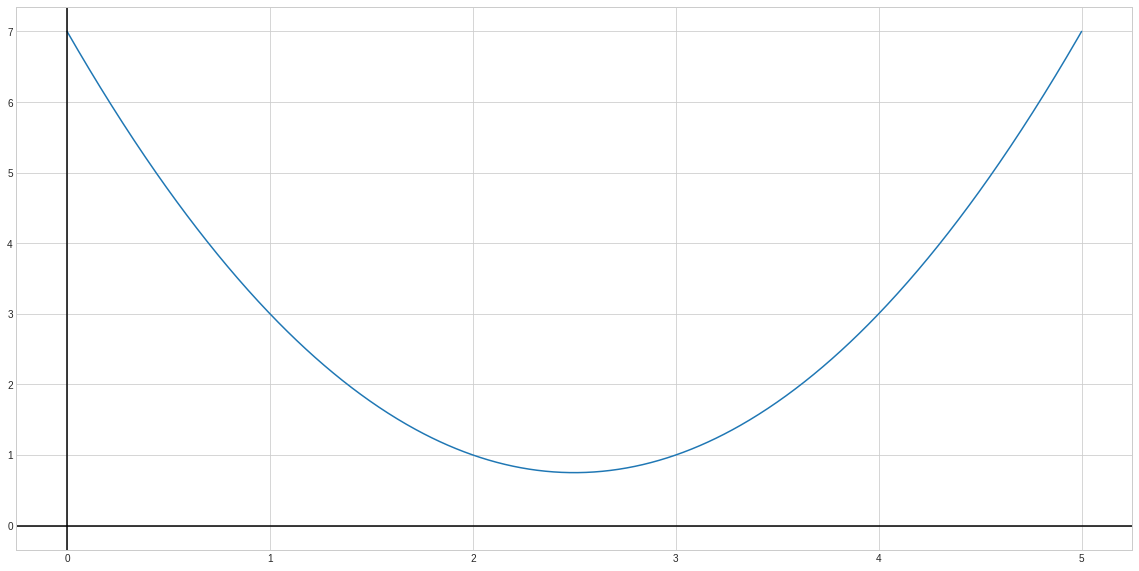

In [45]:
fig, ax = plt.subplots()
ax.plot(x, p(x))
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')

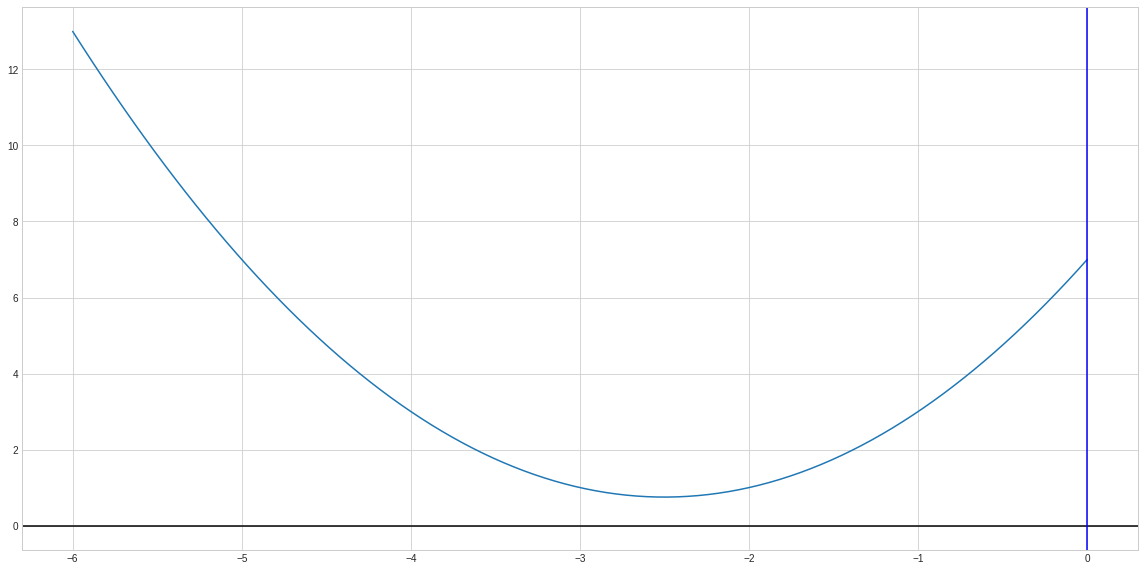

In [60]:
p = quadratic(a=1.0, b=5.0, c=6.0)
x = np.linspace(0.0, -6.0, 100)
fig, ax = plt.subplots()
ax.plot(x, p(x))
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='b')